<h1>Ejercicio completo</h1>

Vamos a tratar de reproducir la misma visualización que hemos hecho en ggplot2, pero esta vez con matplotlib.

<h2>Preparación de datos</h2>

In [1]:
# Importamos los paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leemos el set de datos
data = pd.read_csv('weather-madrid.txt', sep='\s+', header=None)

In [3]:
# Comprobamos su contenido
data.head()

,0,1,2,3
0,1,1,1995,45.9
1,1,2,1995,40.0
2,1,3,1995,34.1
3,1,4,1995,37.0
4,1,5,1995,43.1


In [4]:
# Identificamos las columnas y renombramos para facilitar su tratamiento a day, month, year y temp
data.columns = ['month', 'day', 'year', 'temp']

In [5]:
# Revisamos la información de fechas y vemos si hay "cosas raras"
data.month.value_counts().sort_index()

1     682
2     622
3     682
4     660
5     682
6     660
7     682
8     682
9     660
10    682
11    660
12    655
Name: month, dtype: int64

In [6]:
data.day.value_counts().sort_index()

1     264
2     264
3     264
4     263
5     263
6     263
7     263
8     263
9     263
10    263
11    263
12    263
13    263
14    263
15    263
16    263
17    263
18    263
19    263
20    263
21    263
22    263
23    263
24    263
25    263
26    263
27    263
28    263
29    247
30    242
31    153
Name: day, dtype: int64

In [7]:
data.year.value_counts().sort_index()

1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    366
2016    338
Name: year, dtype: int64

In [8]:
data = data[data.year < 2015]

In [9]:
# Revisamos la información de temperaturas y vemos si hay "cosas raras"
data.temp.describe()

count    7305.000000
mean       58.449350
std        15.652066
min       -99.000000
25%        47.000000
50%        57.200000
75%        70.900000
max        89.800000
Name: temp, dtype: float64

In [10]:
data = data[data.temp >= 0]

In [11]:
# Convertimos la información de fechas en grados Celsius (más comunes): ºC = (ºF - 32) / 1.8
data = data.assign(
    temp = (data.temp - 32.0) / 1.8
)

In [12]:
# Creamos una DataFrame "past" de información histórica que contenga:
# - Información agregada desde 1995 a 2013.
# - Una fila por cada día del año (de 1 a 366)
# - El valor mínimo por cada día de los últimos años
# - El valor máximo por cada día de los últimos años
# - Los límites inferior y superior del intervalo de confianza al 95% de la media de temperaturas
past = data[data.year <= 2013]
past = past.assign(
    year_day = past.groupby('year').cumcount() + 1
)
past_group = past.groupby('year_day')['temp']
past_min = past_group.min()
past_max = past_group.max()
past_mean_sup = past_group.mean() + 2.100922 * past_group.std() / np.sqrt(past_group.size())
past_mean_inf = past_group.mean() - 2.100922 * past_group.std() / np.sqrt(past_group.size())
past = pd.concat([past_min, past_max, past_mean_inf, past_mean_sup], axis=1).reset_index()
past.columns = ['year_day', 'min', 'max', 'mean_inf', 'mean_sup']
past.head(39)

,year_day,min,max,mean_inf,mean_sup
0,1,0.888889,12.055556,5.099187,7.655199
1,2,2.555556,10.888889,5.408962,7.620277
2,3,1.166667,11.222222,4.680036,7.442771
3,4,2.555556,11.166667,4.611340,7.178134
4,5,0.388889,10.722222,3.917605,7.059003
5,6,1.722222,12.222222,4.420477,7.363149
6,7,-0.444444,10.944444,3.074690,6.100749
7,8,-1.611111,9.777778,3.368732,6.175127
8,9,-0.388889,11.388889,3.716207,7.003091
9,10,-2.888889,10.000000,2.797837,6.190467


In [13]:
# Creamos un DataFrame "present" de información actual que contenga:
# - Información sólo de 2014
# - Una fila por cada día del año (de 1 a 366, si tenemos todos los días)
# - El valor de cada día
present = data[data.year == 2014]
present = present.assign(
    year_day = present.groupby('year').cumcount() + 1
)
present = present[['year_day', 'temp']]
present.head()

,year_day,temp
6940,1,8.166667
6941,2,10.888889
6942,3,11.833333
6943,4,8.611111
6944,5,6.388889


In [14]:
# Creamos un DataFrame "present_highs" de información actual que contenga:
# - Información sólo de 2014
# - Una fila por cada día del año (de 1 a 366, se tenemos todos los días)
# - Nos quedamos sólo con las fechas y temperaturas de los días más calurosos
present_highs = pd.merge(present, past, on='year_day', how='left')
present_highs = present_highs[present_highs.temp > present_highs['max']]
present_highs = present_highs[['year_day', 'temp']]
present_highs

,year_day,temp
2,3,11.833333
30,31,9.388889
43,44,12.833333
59,60,13.500000
75,76,14.444444
98,99,19.555556
103,104,19.055556
104,105,18.888889
105,106,19.944444
127,128,22.777778


In [15]:
# Creamos un data.frame "present.lows" de información actual que contenga:
# - Información sólo de 2014
# - Una fila por cada día del año (de 1 a 366, se tenemos todos los días)
# - Nos quedamos sólo con las fechas y temperaturas de los días más fríos
present_lows = pd.merge(present, past, on='year_day', how='left')
present_lows = present_lows[present_lows.temp < present_lows['min']]
present_lows = present_lows[['year_day', 'temp']]
present_lows

,year_day,temp
173,174,18.388889
363,364,0.333333


<h2>Visualización de series (datos + tipos de gráfico + colores)</h2>

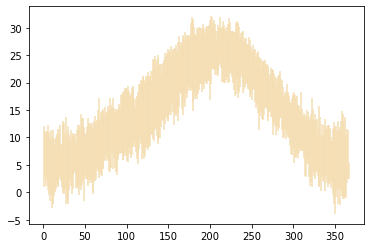

In [16]:
# Visualizamos la serie histórica, color #f5deb3
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3")
plt.show()

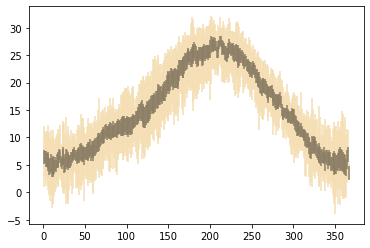

In [17]:
# Añadimos la serie histórica de intervalo de confianza, color #8b7e66
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3")
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66")
plt.show()

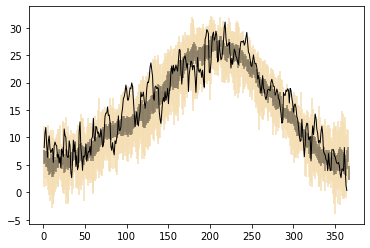

In [18]:
# Añadimos la serie de 2014, ancho 0.5
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3")
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66")
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1)
plt.show()

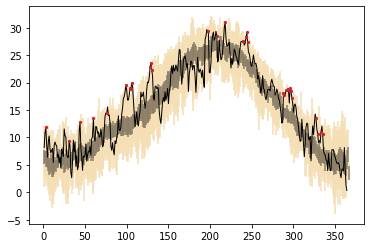

In [19]:
# Añadimos la serie de temperaturas máximas, tamaño 5, color #cd2626
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.show()

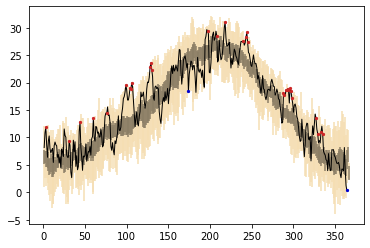

In [20]:
# Añadimos la serie de temperaturas mínimas, tamaño 5, color #0000cd
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.show()

<h2>Configuración de ejes, tamañoy etiquetas/labels del gráfico</h2>

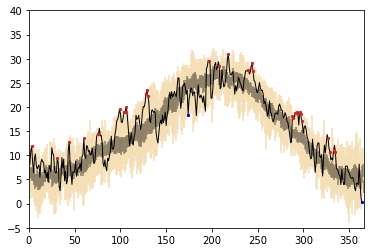

In [21]:
# Establecemos los ejes para que se ajusten al ancho de los datos (0, 366) y al alto (-5, 40)
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.show()

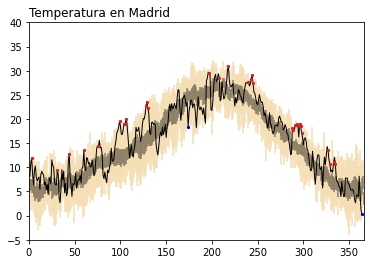

In [22]:
# Establecemos el nombre del gráfico: Temperatura en Madrid
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left")
plt.show()

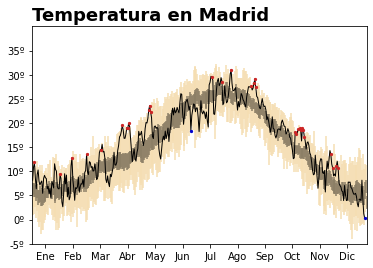

In [23]:
# Establecemos los ticks de los ejes para que contengan los meses y las temperaturas en formato Xº
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left", weight="bold", size=18)
plt.xticks(np.arange(15, 365, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(np.arange(-5, 40, 5), [str(x) + 'º' for x in np.arange(-5, 40, 5)])
plt.show()

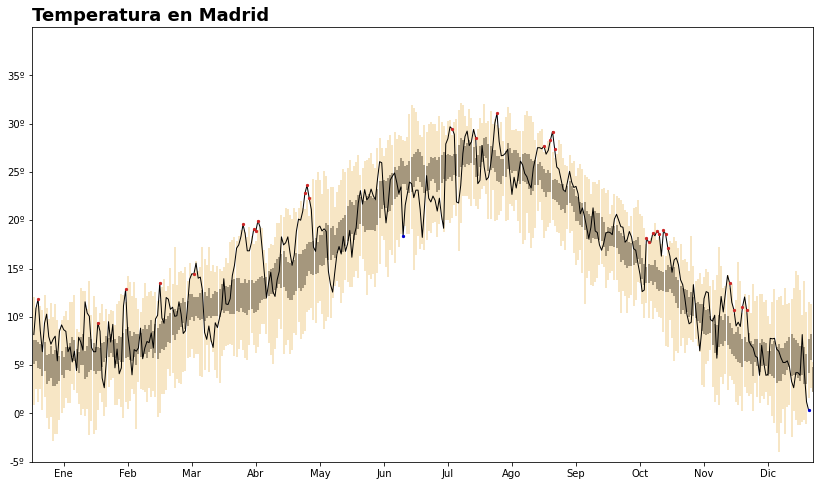

In [24]:
# Establecemos el tamaño del gráfico para que sea más ancho
plt.figure(figsize=(14, 8))
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left", weight="bold", size=18)
plt.xticks(np.arange(15, 365, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(np.arange(-5, 40, 5), [str(x) + 'º' for x in np.arange(-5, 40, 5)])
plt.show()

<h2>Estilos</h2>

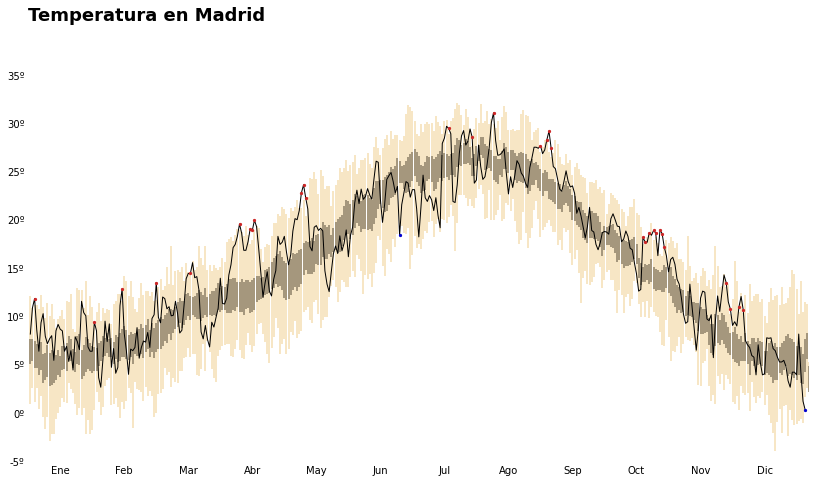

In [25]:
# Modificamos el estilo para que no haya ejes, ni ticks

plt.style.use({
        "axes.spines.bottom": False,
        "axes.spines.top": False,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "xtick.major.size": 0,
        "ytick.major.size": 0
    })

plt.figure(figsize=(14, 8))
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left", weight="bold", size=18)
plt.xticks(np.arange(15, 365, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(np.arange(-5, 40, 5), [str(x) + 'º' for x in np.arange(-5, 40, 5)])
plt.show()

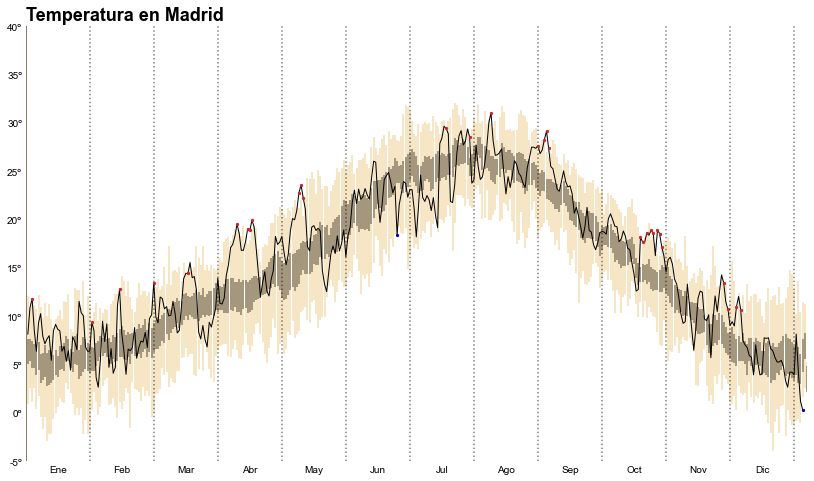

In [26]:
# Modificamos la fuente para que sea arial y pintamos la línea vertical del 0 (tamaño 1, color #8b7e66) y las lineas
# de separación de los meses
plt.style.use({
        "axes.spines.bottom": False,
        "axes.spines.top": False,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "xtick.major.size": 0,
        "ytick.major.size": 0,
        "font.family": 'Arial'
    })

plt.figure(figsize=(14, 8))
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.year_day, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.year_day, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.year_day, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.vlines(0, -5, 45, color="#8b7e66", linewidth=2)
plt.vlines(np.arange(30, 365, 30), -5, 45, color="k", alpha=0.5, linestyle="dotted")
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left", weight="bold", size=18)
plt.xticks(np.arange(15, 365, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(np.arange(-5, 41, 5), [str(x) + 'º' for x in np.arange(-5, 41, 5)])
plt.show()

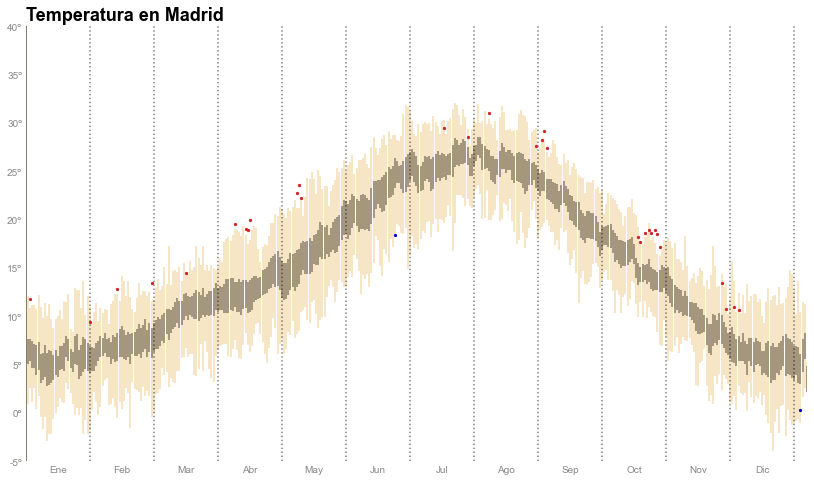

In [27]:
# Modificamos el color de los ticks para que sea #888888 y el estilo del título para que sea de tamaño 14, negrita y
# esté alineado a la izquierda
plt.style.use({
        "axes.spines.bottom": False,
        "axes.spines.top": False,
        "axes.spines.left": False,
        "axes.spines.right": False,
        "xtick.major.size": 0,
        "ytick.major.size": 0,
        "font.family": 'Arial',
        "xtick.color": "#888888",
        "ytick.color": "#888888"
    })

plt.figure(figsize=(14, 8))
plt.vlines(past.year_day, past['min'], past['max'], colors="#f5deb3", zorder=1)
plt.vlines(past.year_day, past['mean_inf'], past['mean_sup'], colors="#8b7e66", zorder=2)
plt.plot(present.index, present['temp'], color = "k", linewidth = 1, zorder=3)
plt.scatter(present_highs.index, present_highs['temp'], color = "#cd2626", s = 5, zorder=4)
plt.scatter(present_lows.index, present_lows['temp'], color = "#0000cd", s = 5, zorder=5)
plt.vlines(0, -5, 45, color="#8b7e66", linewidth=2)
plt.vlines(np.arange(30, 365, 30), -5, 45, color="k", alpha=0.5, linestyle="dotted")
plt.xlim(0, 366)
plt.ylim(-5, 40)
plt.title('Temperatura en Madrid', loc = "left", weight="bold", size=18)
plt.xticks(np.arange(15, 365, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.yticks(np.arange(-5, 41, 5), [str(x) + 'º' for x in np.arange(-5, 41, 5)])
plt.show()